<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

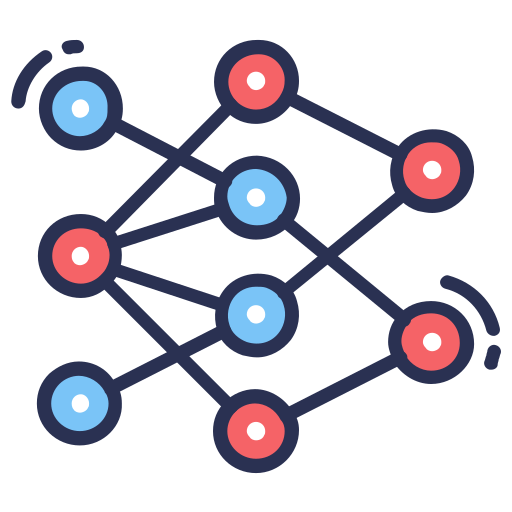

## **Great Learning / Deakin (MDS) Project Submission**
<hr>

>**Neural Networks (NN) Project**<br>
>*Goal : Demonstrate the ability to build a neural network model to classify signal data*<br>
>*Domain : Electronics and Telecommunication* <br>
>*Developer : Nishant Killedar*
<br>

> **CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.
<br>

> **PROJECT OBJECTIVE**: Build a classifier which can use the given parameters to determine the signal strength or quality..

<hr>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import os
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# **Section 1 : Data import and Understanding [10 Marks]**
<hr>
<li>A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]
<li>B. Check for missing values and print percentage for each attribute. [2 Marks]
<li>C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]
<li>D. Visualise distribution of the target variable. [2 Marks]
<li>E. Share insights from the initial data analysis (at least 2). [2 Marks]
<hr>

In [2]:
data = pd.read_csv('/content/drive/MyDrive/datasets/nn/NN Project Data - Signal.csv')

In [3]:
nulls = (data.isnull().sum() / data.shape[0] * 100).round(2)
print("{0}".format(nulls))

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [4]:
zeros = (data.eq(0).sum() / data.shape[0] * 100).round(2)
print("{0}".format(zeros))

Parameter 1        0.00
Parameter 2        0.00
Parameter 3        8.26
Parameter 4        0.00
Parameter 5        0.00
Parameter 6        0.00
Parameter 7        0.00
Parameter 8        0.00
Parameter 9        0.00
Parameter 10       0.00
Parameter 11       0.00
Signal_Strength    0.00
dtype: float64


<hr>
The dataset has missing values (zero values) for Parameter 3  <br> The above table shows % of missing data for each attribute
<hr>

In [5]:
duplicateRows = data[data.duplicated()]
duplicateRows

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
datacln = data.drop_duplicates(subset=None, keep='first', inplace=False)

In [7]:
datacln[datacln.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


<hr>
The dataset has 240 duplicate rows <br> Using drop_duplicates to remove duplicate rows from the dataset<br> We will check for null values again after dropping duplicate rows
<hr>

In [8]:
zeros = (datacln.eq(0).sum() / datacln.shape[0] * 100).round(2)
print("{0}".format(zeros))

Parameter 1        0.00
Parameter 2        0.00
Parameter 3        8.68
Parameter 4        0.00
Parameter 5        0.00
Parameter 6        0.00
Parameter 7        0.00
Parameter 8        0.00
Parameter 9        0.00
Parameter 10       0.00
Parameter 11       0.00
Signal_Strength    0.00
dtype: float64


In [9]:
datacln = datacln.replace(0, np.NaN)

<Axes: >

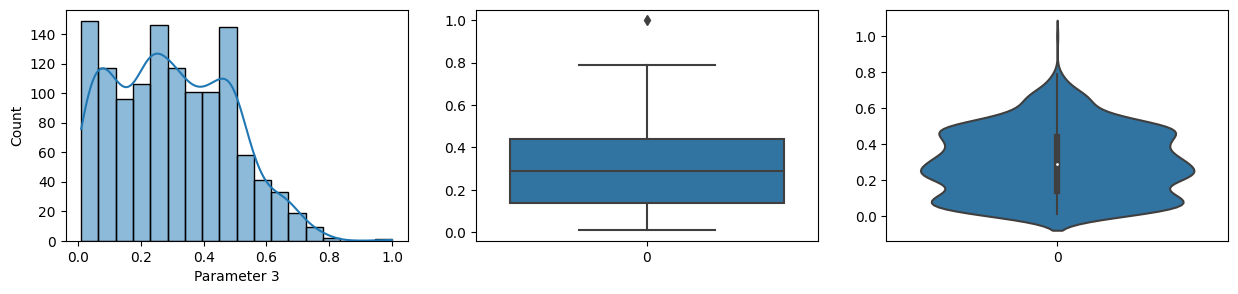

In [10]:
fig, sub = plt.subplots(1,3, figsize=(15,3))
sns.histplot(datacln['Parameter 3'], kde=True, ax=sub[0])
sns.boxplot(datacln['Parameter 3'], ax=sub[1])
sns.violinplot(datacln['Parameter 3'], ax=sub[2])

<hr>

As can be seen from the box plot, we do not have many outliers
From this, we can safely use the mean or median as a value for all zero values

<hr>

In [11]:
datacln['Parameter 3'] = datacln['Parameter 3'].fillna(datacln['Parameter 3'].median())

In [12]:
datacln['Parameter 3'].isnull().sum()

0

<hr>
We have removed all the duplicate rows and imputed missing values with the median
<hr>

<Axes: >

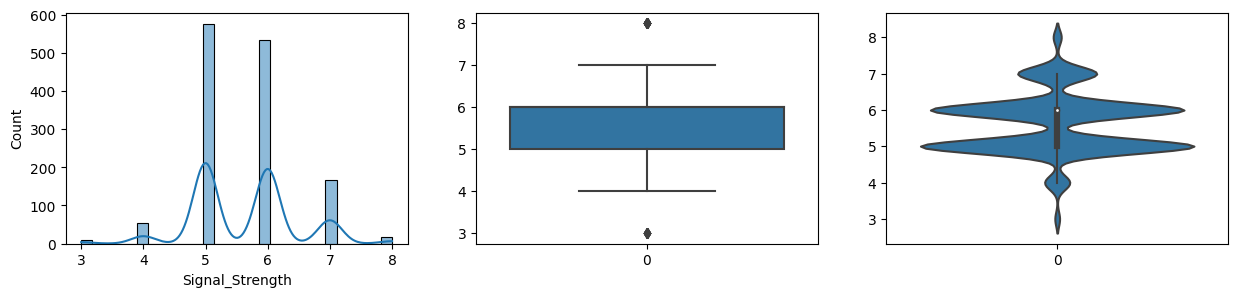

In [13]:
fig, sub = plt.subplots(1,3, figsize=(15,3))
sns.histplot(datacln['Signal_Strength'], kde=True, ax=sub[0])
sns.boxplot(datacln['Signal_Strength'], ax=sub[1])
sns.violinplot(datacln['Signal_Strength'], ax=sub[2])

**Inference / Insights**
<hr>
<li>There are very few data points with Signal Strength 3 or 8. Most rows have signal strength of 5, 6. We have some data points for 4 and 7 strength
<li> Using this model to train data may not predict lower signal strength correctly
<li>We will need to use sampling techniques or data augmentation to get more data for lower signal so we can effectively predict

<hr>

# **2. Data preprocessing [7 Marks]**
<hr>
<li>A. Split the data into X & Y. [1 Marks]
<li>B. Split the data into train & test with 70:30 proportion.[1 Marks]
<li>C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]
<li>D. Normalise the train and test data with appropriate method. [2 Marks]
<li>E. Transform Labels into format acceptable by Neural Network [2 Marks]
<hr>

In [14]:
x = datacln.iloc[:,:-1]
y = datacln.iloc[:,-1]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(951, 11)
(951,)
(408, 11)
(408,)


<hr>
<li> &#x261D Split the data into x_train / y_train / x_test / y_test
<li> &#x261D Verified the shape for all 4 variables - train / test data are in sync
<hr>

In [17]:
ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

<hr>
<li> &#x261D Normalized the train and test data using StandardScaler
<hr>

In [18]:
y_train_nn = to_categorical(y_train, dtype="uint8")
y_test_nn=to_categorical(y_test, dtype="uint8")

<hr>
<li> &#x261D Transformed labels into acceptable format
<hr>

In [19]:
print("First 5 training lables :\n", y_train_nn[:5])

First 5 training lables :
 [[0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0]]


# **3. Model Training & Evaluation using Neural Network [13 Marks]**
<hr>
<li> A. Design a Neural Network to train a classifier. [3 Marks]
<li> B. Train the classifier using previously designed Architecture [2 Marks]
<li> C. Plot 2 separate visuals. [3 Marks]<br>
&emsp;&emsp;i. Training Loss and Validation Loss<br>
&emsp;&emsp;ii. Training Accuracy and Validation Accuracy
<li> D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]
<li> E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]
©
<hr>

In [20]:
def plot_loss(ax, history):

  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  ax.set_title('model loss')
  ax.set_ylabel('Loss')
  ax.set_xlabel('Epoch')
  ax.legend(['train', 'validation'], loc='upper left')


In [21]:
def plot_accuracy(ax, history):

  ax.plot(history.history['accuracy'])
  ax.plot(history.history['val_accuracy'])
  ax.set_title('model accuracy')
  ax.set_ylabel('Accuracy')
  ax.set_xlabel('Epoch')
  ax.legend(['train', 'validation'], loc='upper left')

In [22]:
def plot_confusion_matrix (ax, y_pred, y_test, labels) :

  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)
  cm = confusion_matrix(y_test, y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
  cmd.plot(ax=ax, cmap='tab20b')

In [23]:
def build_3Hlayer_model(params):

  inputdim = params["inputdim"]
  layer1 = params["layer1"]
  layer2 = params["layer2"]
  layer3 = params["layer3"]
  oplayer = params["oplayer"]
  loss = params["loss"]
  optimizer = params["optimizer"]
  metrics = params["metrics"]

  model = Sequential()
  if layer1 != 0 : model.add(Dense(layer1, activation='relu', input_dim=inputdim))
  if layer2 != 0 : model.add(Dense(layer2, activation='relu'))
  if layer3 != 0 : model.add(Dense(layer3, activation='relu'))
  model.add(Dense(oplayer, activation='softmax'))

  model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  # print(model.summary())

  return model

In [24]:
def train_model (model,params,x_train,y_train):

  batch_size = params["batch_size"]
  epochs = params["epochs"]
  verbose = params["verbose"]
  val = params["val"]

  history = model.fit( x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=val)

  return history

In [25]:
def plot_results (history, y_pred, y_test, labels) :

  fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))

  plot_loss(ax0,history)
  plot_accuracy(ax1,history)
  plot_confusion_matrix(ax2, y_pred, y_test, labels)

In [26]:
def build_train_predict_plot_nn (params, x_train, y_train, x_test, y_test, labels) :

  model = build_3Hlayer_model(params)
  history = train_model(model, params, x_train, y_train)
  ypred = model.predict(x_test)
  plot_results (history, ypred, y_test, labels)


**Option 1 : Neural Network with 3 layers ( 64, 32, 32 )**

13/13 [==============================] - 0s 2ms/step


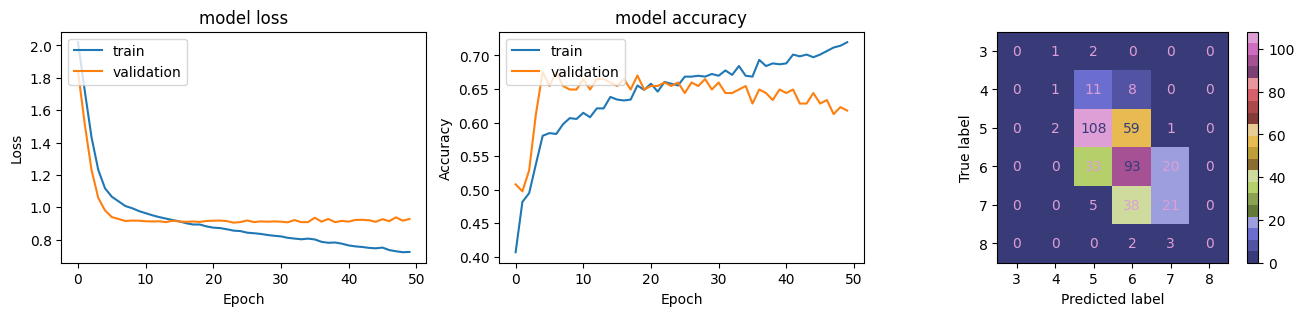

In [27]:
params_option_1 = {
  "inputdim" : x_train_std.shape[1],
  "layer1" : 64,
  "layer2" : 32,
  "layer3" : 32,
  "oplayer" : 9,
  "loss" : "categorical_crossentropy",
  "optimizer" : "adam",
  "metrics" : ["accuracy"],
  "batch_size" : 64,
  "epochs" : 50,
  "verbose" : 0,
  "val" : 0.2
}
labels = [3,4,5,6,7,8]
build_train_predict_plot_nn (params_option_1, x_train_std, y_train_nn, x_test_std, y_test_nn, labels)


**Option 2 : Neural Network with 3 layers ( 32, 16, 8 )**


13/13 [==============================] - 0s 2ms/step


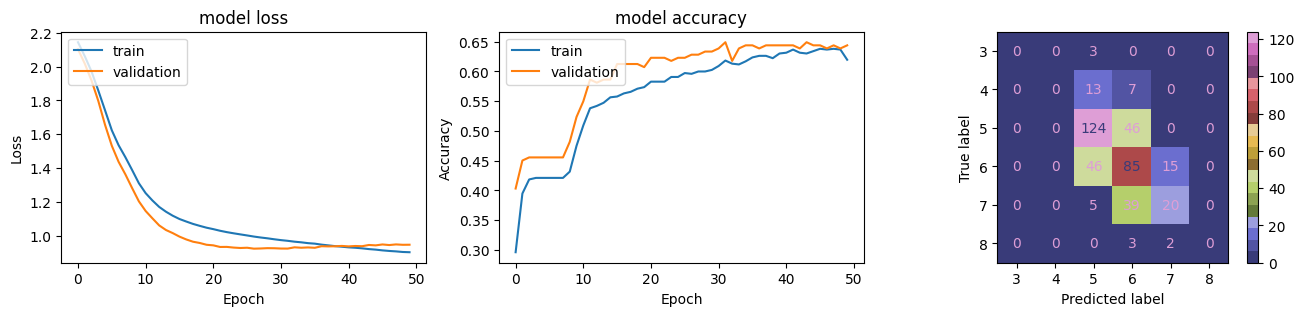

In [28]:
params_option_2 = {
    "inputdim" : x_train_std.shape[1],
    "layer1" : 32,
    "layer2" : 16,
    "layer3" : 8,
    "oplayer" : 9,
    "loss" : "categorical_crossentropy",
    "optimizer" : "adam",
    "metrics" : ["accuracy"],
    "batch_size" : 64,
    "epochs" : 50,
    "verbose" : 0,
    "val" : 0.2
    }
labels = [3,4,5,6,7,8]
build_train_predict_plot_nn (params_option_2, x_train_std, y_train_nn, x_test_std, y_test_nn, labels)


**Option 3 : Neural Network with 2 layers ( 32, 8 )**


13/13 [==============================] - 0s 2ms/step


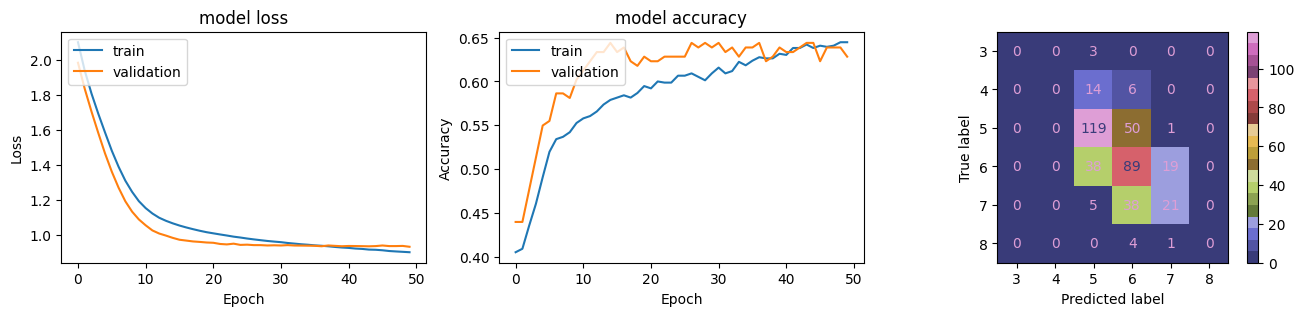

In [29]:
params_option_3 = {
  "inputdim" : x_train_std.shape[1],
  "layer1" : 32,
  "layer2" : 8,
  "layer3" : 0,
  "oplayer" : 9,
  "loss" : "categorical_crossentropy",
  "optimizer" : "adam",
  "metrics" : ["accuracy"],
  "batch_size" : 64,
  "epochs" : 50,
  "verbose" : 0,
  "val" : 0.2
}
labels = [3,4,5,6,7,8]
build_train_predict_plot_nn (params_option_3, x_train_std, y_train_nn, x_test_std, y_test_nn, labels)

<hr>
<li> Option 1 has 3 layers with a high number of nodes & the graph shows that it is overfitting the data. It is able to predict some signals with lower strength.
<li> Option 2 has 3 layers with a smaller number of nodes than Option 1, it is not overfitting but is unable to predict signals of lower strength ( predicts 3, 4, 8 )
<li> Option 3 has 2 layers, it is not overfitting the data but is unable to predict signals of lower strength ( predicts 3, 4, 7, 8 )

**Inference** <br>
Overall, Option 2 is doing best within the 3 models. As called out earlier, the data for lower signal strengths will need to be augmented or oversampled so that models are able to learn and predict these signals better
<hr>

<hr>

>**Neural Networks (NN) Project**<br>
>*Goal : Demonstrate the ability to build a neural network model to classify signal data*<br>
>*Domain : Autonomous Vehicles* <br>
>*Developer : Nishant Killedar*
<br>

> **CONTEXT:** Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
> The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
> While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
> The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
<br>

> **PROJECT OBJECTIVE**: Build a classifier which can use the given parameters to determine the signal strength or quality..

<hr>

# **Data Import and Exploration [5 Marks]**

<hr>
<li>A. Read the .h5 file and assign to a variable. [2 Marks]
<li>B. Print all the keys from the .h5 file. [1 Marks]
<li>C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]
<hr>

In [30]:
f1 = h5py.File('/content/drive/MyDrive/datasets/nn/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [31]:
print(f1.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [32]:
x2_train, y2_train = np.array(f1['X_train']), np.array(f1['y_train'])
x2_test, y2_test = np.array(f1['X_test']), np.array(f1['y_test'])

# **2. Data Visualisation and preprocessing [13 Marks]**

<hr>
<li>A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]
<li>B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]
<li>C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]
<li>D. Normalise the images i.e. Normalise the pixel values. [2 Marks]
<li>E. Transform Labels into format acceptable by Neural Network [2 Marks]
<li>F. Print total Number of classes in the Dataset. [1 Marks]
<hr>

In [33]:
# Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync
print('X Train:',x2_train.shape)
print('y Train:',y2_train.shape)
print('X Test:',x2_test.shape)
print('y Test:',y2_test.shape)

X Train: (42000, 32, 32)
y Train: (42000,)
X Test: (18000, 32, 32)
y Test: (18000,)


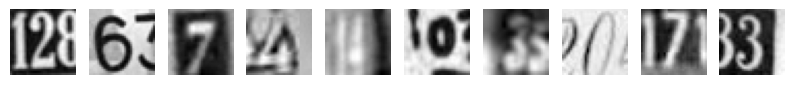

labels : [2 6 7 4 4 0 3 0 7 3]


In [34]:
# Visualise first 10 images in train data and print its corresponding labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x2_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('labels : %s' % (y2_train[0:10]))

In [35]:
# Reshape all the images with appropriate shape update the data in same variable
image_vector_size = 32*32
x2_train_rs = x2_train.reshape(x2_train.shape[0], image_vector_size)
x2_test_rs = x2_test.reshape(x2_test.shape[0], image_vector_size)

print('Training set', x2_train_rs.shape, y2_train.shape)
print('Test set', x2_train_rs.shape, y2_test.shape)

Training set (42000, 1024) (42000,)
Test set (42000, 1024) (18000,)


In [36]:
# Normalise the images i.e. Normalise the pixel values
x2_train_rs = x2_train_rs / 255.0
x2_test_rs = x2_test_rs / 255.0

In [37]:
# Transform Labels into format acceptable by Neural Network
y2_train_cat=to_categorical(y2_train)
y2_test_cat=to_categorical(y2_test)

In [38]:
# Print total Number of classes in the Dataset
print('Number of classes in the dataset is :', y2_train_cat.shape[1])

Number of classes in the dataset is : 10


# **3. Model Training & Evaluation using Neural Network [12 Marks]**

<hr>
<li>A. Design a Neural Network to train a classifier. [3 Marks]
<li>B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]
<li>C. Evaluate performance of the model with appropriate metrics. [2 Marks]
<li>D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]
<hr>

In [48]:
def build_multilayer_model(params):

  inputdim = params["inputdim"]
  layer1 = params["layer1"]
  layer2 = params["layer2"]
  layer3 = params["layer3"]
  layer4 = params["layer4"]
  layer5 = params["layer5"]
  layer6 = params["layer6"]
  dropout = params["dropout"]
  dropoutvalue = params["dropoutvalue"]
  norm = params["norm"]
  oplayer = params["oplayer"]
  loss = params["loss"]
  optimizer = params["optimizer"]
  metrics = params["metrics"]

  model = Sequential()
  if layer1 != 0 : model.add(Dense(layer1, activation='relu', input_dim=inputdim))
  if layer2 != 0 : model.add(Dense(layer2, activation='relu'))
  if layer3 != 0 : model.add(Dense(layer3, activation='relu'))
  if layer4 != 0 : model.add(Dense(layer4, activation='relu'))
  if layer5 != 0 : model.add(Dense(layer5, activation='relu'))
  if layer6 != 0 : model.add(Dense(layer6, activation='relu'))
  if dropout == 'Y' : model.add(Dropout(dropoutvalue))
  if norm == 'Y' : model.add(BatchNormalization())
  model.add(Dense(oplayer, activation='softmax'))

  model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  # print(model.summary())

  return model

In [60]:
def plot_multilayernn_results (history, y_pred, y_test, labels) :

  fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

  plot_loss(ax0,history)
  plot_accuracy(ax1,history)
  plot_confusion_matrix(ax2, y_pred, y_test, labels)

In [49]:
params_option_4 = {
  "inputdim" : x2_train_rs.shape[1],
  "layer1" : 256,
  "layer2" : 128,
  "layer3" : 64,
  "layer4" : 0,
  "layer5" : 0,
  "layer6" : 0,
  "dropout" : "Y",
  "dropoutvalue" : 0.2,
  "norm" : "Y",
  "oplayer" : 10,
  "loss" : "categorical_crossentropy",
  "optimizer" : "adam",
  "metrics" : ["accuracy"],
  "batch_size" : 1024,
  "epochs" : 100,
  "verbose" : 0,
  "val" : 0.2
}
labels = [0,1,2,3,4,5,6,7,8,9]
# build_train_predict_plot_nn (params_option_3, x2_train_rs, y2_train_cat, x2_test_rs, y2_test_cat, labels)

In [50]:
mdl4 = build_multilayer_model(params_option_4)

In [51]:
mdl4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               262400    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                      

In [64]:
checkpoint = ModelCheckpoint("model_weights_1.h5",monitor='val_accuracy', save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.0001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [65]:
history=mdl4.fit(x2_train_rs, y2_train_cat, validation_split=0.2, epochs=30, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/30

Epoch 1: saving model to model_weights_1.h5
263/263 - 2s - loss: 0.6811 - accuracy: 0.7899 - val_loss: 0.7153 - val_accuracy: 0.7807 - lr: 1.0000e-05 - 2s/epoch - 7ms/step
Epoch 2/30

Epoch 2: saving model to model_weights_1.h5
263/263 - 2s - loss: 0.6828 - accuracy: 0.7877 - val_loss: 0.7144 - val_accuracy: 0.7812 - lr: 1.0000e-05 - 2s/epoch - 7ms/step
Epoch 3/30

Epoch 3: saving model to model_weights_1.h5
263/263 - 2s - loss: 0.6816 - accuracy: 0.7883 - val_loss: 0.7140 - val_accuracy: 0.7813 - lr: 1.0000e-05 - 2s/epoch - 8ms/step
Epoch 4/30

Epoch 4: saving model to model_weights_1.h5
263/263 - 2s - loss: 0.6758 - accuracy: 0.7918 - val_loss: 0.7151 - val_accuracy: 0.7807 - lr: 1.0000e-05 - 2s/epoch - 7ms/step
Epoch 5/30

Epoch 5: saving model to model_weights_1.h5
263/263 - 2s - loss: 0.6797 - accuracy: 0.7906 - val_loss: 0.7148 - val_accuracy: 0.7808 - lr: 1.0000e-05 - 2s/epoch - 8ms/step
Epoch 6/30

Epoch 6: saving model to model_weights_1.h5
263/263 - 2s - loss: 0.6

563/563 [==============================] - 1s 2ms/step


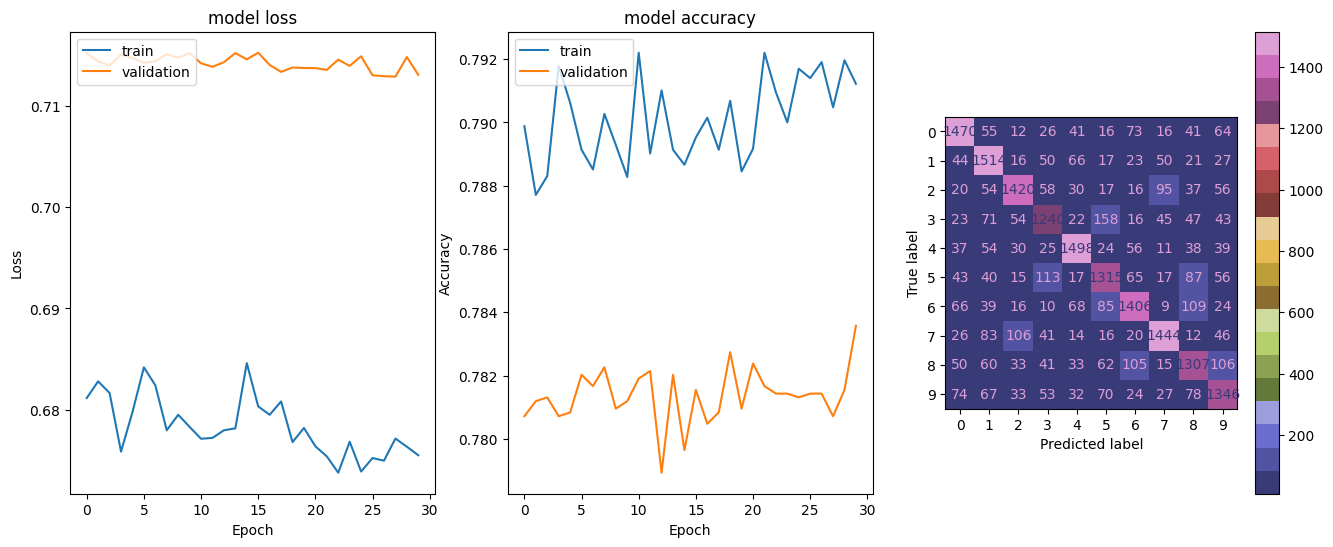

In [66]:
  ypred = mdl4.predict(x2_test_rs)
  plot_multilayernn_results (history, ypred, y2_test_cat, labels)